In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)


In [26]:
observations = pd.read_csv('observations.csv')
print(observations.head())  
species_info = pd.read_csv('species_info.csv')
print(species_info.head())

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85
  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic 

In [27]:
#counting the number of rows
print("Number of rows in observations:", len(observations))
print("Number of rows in species_info:", len(species_info))

Number of rows in observations: 23296
Number of rows in species_info: 5824


In [28]:
# Check for missing values in species_info and observations
observations_missing_info = observations.isnull().sum()
print("Missing values in observations:\n", observations_missing_info)
missing_info = species_info.isnull().sum()
print("Missing values in species_info:\n", missing_info)

Missing values in observations:
 scientific_name    0
park_name          0
observations       0
dtype: int64
Missing values in species_info:
 category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64


In [29]:
#filling missing values in species_info
species_info['category'] = species_info['category'].fillna('Unknown')
#looking for missing values in the 'category' column
missing_category = species_info[species_info['category'].isnull()]
print("Missing values in 'category' column:\n", missing_category)

Missing values in 'category' column:
 Empty DataFrame
Columns: [category, scientific_name, common_names, conservation_status]
Index: []


In [30]:
#checking data types
print("Data types in observations:\n", observations.dtypes)
print("Data types in species_info:\n", species_info.dtypes)

Data types in observations:
 scientific_name    object
park_name          object
observations        int64
dtype: object
Data types in species_info:
 category               object
scientific_name        object
common_names           object
conservation_status    object
dtype: object


In [31]:
#check for duplicates in observations
duplicates_observations = observations.duplicated().sum()
print("Number of duplicate rows in observations:", duplicates_observations)
#check for duplicates in species_info
duplicates_species_info = species_info.duplicated().sum()
print("Number of duplicate rows in species_info:", duplicates_species_info)

Number of duplicate rows in observations: 15
Number of duplicate rows in species_info: 0


In [32]:
#showing the duplicate rows in observations
duplicate_rows_observations = observations[observations.duplicated()]
print("Duplicate rows in observations:\n", duplicate_rows_observations)
#showing the duplicate rows in species_info
duplicate_rows_species_info = species_info[species_info.duplicated()]
print("Duplicate rows in species_info:\n", duplicate_rows_species_info)

Duplicate rows in observations:
               scientific_name                            park_name  \
7263   Echinochloa crus-galli  Great Smoky Mountains National Park   
8710    Streptopelia decaocto            Yellowstone National Park   
10038          Plantago major  Great Smoky Mountains National Park   
10674           Arctium minus               Yosemite National Park   
12381    Eleocharis palustris  Great Smoky Mountains National Park   
13372     Hesperis matronalis                  Bryce National Park   
16741       Prunella vulgaris  Great Smoky Mountains National Park   
17378    Potentilla norvegica               Yosemite National Park   
17577      Spilogale putorius            Yellowstone National Park   
18141           Poa compressa  Great Smoky Mountains National Park   
19392       Cichorium intybus            Yellowstone National Park   
20294  Botrychium virginianum            Yellowstone National Park   
20820    Monotropa hypopithys  Great Smoky Mountains Nati

In [33]:
# setting lower on scientifc name
observations['scientific_name'] = observations['scientific_name'].str.lower().str.strip()
species_info['scientific_name'] = species_info['scientific_name'].str.lower().str.strip()

At this point of the project, we have cleaned the data for missing values and check the data types.

From here we are starting the EDA

In [34]:
print(observations.describe())
print(species_info.describe())

       observations
count  23296.000000
mean     142.287904
std       69.890532
min        9.000000
25%       86.000000
50%      124.000000
75%      195.000000
max      321.000000
              category scientific_name        common_names conservation_status
count             5824            5824                5824                 191
unique               7            5541                5504                   4
top     Vascular Plant   procyon lotor  Brachythecium Moss  Species of Concern
freq              4470               3                   7                 161


In [35]:
print(observations.park_name.unique())

['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


park_name
Great Smoky Mountains National Park    5824
Yosemite National Park                 5824
Bryce National Park                    5824
Yellowstone National Park              5824
Name: count, dtype: int64


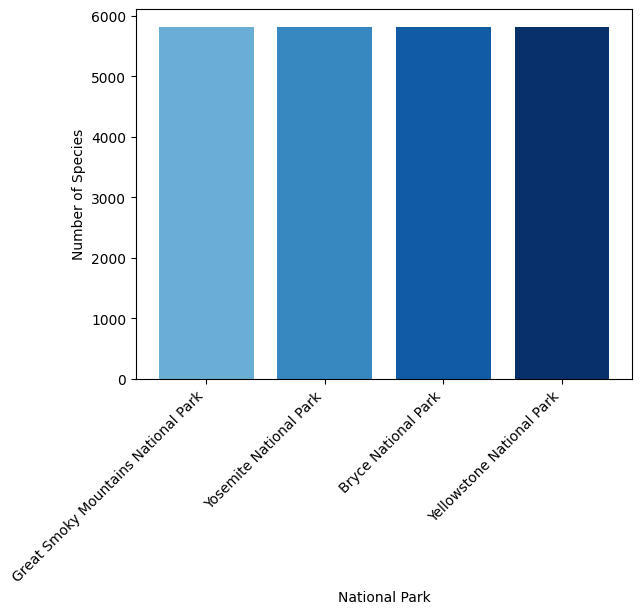

In [36]:
# counting species per national park
species_per_park = observations['park_name'].value_counts()
print(species_per_park)
colors = plt.cm.Blues(np.linspace(0.5, 1, len(species_per_park)))
plt.bar(species_per_park.index, species_per_park.values, color=colors)
plt.xlabel('National Park')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Species')
plt.show()

We are now taking the information from observations and separating it by each park

In [37]:
#separating the information from observations by each park
great_smoky = observations[observations['park_name'] == 'Great Smoky Mountains National Park']
yosemite = observations[observations['park_name'] == 'Yosemite National Park']
yellowstone = observations[observations['park_name'] == 'Yellowstone National Park']
bryce = observations[observations['park_name'] == 'Bryce National Park']

In [38]:
# Extracting the scientific name of endagered species 
endangeres_scientific_names = species_info[species_info['conservation_status'].notna()]
#asigning the conservation status to each park dataset
great_smoky_info = great_smoky.merge(endangeres_scientific_names, on="scientific_name", how="left")
yosemite_info = yosemite.merge(endangeres_scientific_names, on='scientific_name', how='left')
yellowstone_info = yellowstone.merge(endangeres_scientific_names, on ='scientific_name', how='left')
bryce_info = bryce.merge(endangeres_scientific_names, on = 'scientific_name', how='left')
#saving the file into csv


Number of different categories: category
Vascular Plant       4470
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
Name: count, dtype: int64


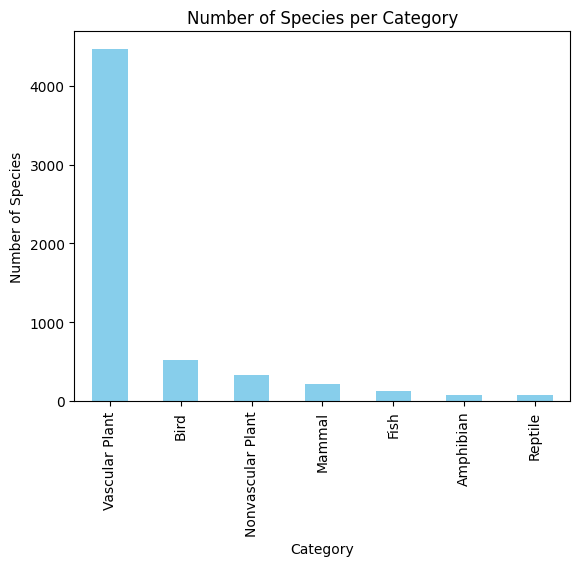

In [39]:
# How many different categories of species are there in the dataset?
def categorie_per_species(df):
    return df['category'].value_counts()

print("Number of different categories:", categorie_per_species(species_info))

# Plotting the number of species in each category
categories_count = species_info['category'].value_counts()
categories_count.plot(kind='bar', color='skyblue')
plt.xlabel('Category')
plt.ylabel('Number of Species')
plt.title('Number of Species per Category')
plt.show()

In [40]:
# Check for endangered species per national park
def check_endangered_species(df):
    return df[df['conservation_status'].notna()].shape[0]
print("Endangered species in Great Smoky Mountains National Park:", check_endangered_species(great_smoky_info))
print("Endangered species in Yosemite National Park:", check_endangered_species(yosemite_info))
print("Endangered species in Yellowstone National Park:", check_endangered_species(yellowstone_info))
print("Endangered species in Bryce National Park:", check_endangered_species(bryce_info))


Endangered species in Great Smoky Mountains National Park: 220
Endangered species in Yosemite National Park: 220
Endangered species in Yellowstone National Park: 220
Endangered species in Bryce National Park: 220


In [41]:
#proprtion of endangered species in each park per category

In [42]:
# Check for how manny categories per park
def count_categories_per_park(df):
    return df['category'].nunique()
print("Number of categories in Great Smoky Mountains National Park:", count_categories_per_park(great_smoky_info))
print("Number of categories in Yosemite National Park:", count_categories_per_park(yosemite_info))
print("Number of categories in Yellowstone National Park:", count_categories_per_park(yellowstone_info))
print("Number of categories in Bryce National Park:", count_categories_per_park(bryce_info))



Number of categories in Great Smoky Mountains National Park: 7
Number of categories in Yosemite National Park: 7
Number of categories in Yellowstone National Park: 7
Number of categories in Bryce National Park: 7


Here we are going to make a analysis to see what are the most endangered categories per park, to see if the values variates depending the park and forward to look for correlation

In [43]:
# we are going to check for the endangered species per category in this dataset
def endangered_species_per_park_category(df):
    for category in df['category'].unique():
        endangered_species = df[(df['category'] == category) & (df['conservation_status'].notna())]
        print(f"Category: {category}, Endangered Species Count: {len(endangered_species)}")
endangered_species_per_park_category(great_smoky_info)

Category: nan, Endangered Species Count: 0
Category: Vascular Plant, Endangered Species Count: 46
Category: Bird, Endangered Species Count: 87
Category: Amphibian, Endangered Species Count: 7
Category: Mammal, Endangered Species Count: 58
Category: Fish, Endangered Species Count: 12
Category: Nonvascular Plant, Endangered Species Count: 5
Category: Reptile, Endangered Species Count: 5


In [44]:
endangered_species_per_park_category(yosemite_info)

Category: nan, Endangered Species Count: 0
Category: Vascular Plant, Endangered Species Count: 46
Category: Fish, Endangered Species Count: 12
Category: Bird, Endangered Species Count: 87
Category: Amphibian, Endangered Species Count: 7
Category: Mammal, Endangered Species Count: 58
Category: Reptile, Endangered Species Count: 5
Category: Nonvascular Plant, Endangered Species Count: 5


In [45]:
endangered_species_per_park_category(yellowstone_info)

Category: nan, Endangered Species Count: 0
Category: Bird, Endangered Species Count: 87
Category: Fish, Endangered Species Count: 12
Category: Amphibian, Endangered Species Count: 7
Category: Vascular Plant, Endangered Species Count: 46
Category: Reptile, Endangered Species Count: 5
Category: Mammal, Endangered Species Count: 58
Category: Nonvascular Plant, Endangered Species Count: 5


In [46]:
# getting the amount of endangered species per category in each park
def endangered_species_count_per_category(df):
    # Filter for endangered species (where conservation_status is not null)
    endangered = df[df['conservation_status'].notna()]
    # Count endangered species per category
    counts = endangered.groupby(['park_name', 'category'], as_index=False)['observations'].sum()
    return counts

print(endangered_species_count_per_category(great_smoky_info))
print(endangered_species_count_per_category(yosemite_info))
print(endangered_species_count_per_category(yellowstone_info))
print(endangered_species_count_per_category(bryce_info))

                             park_name           category  observations
0  Great Smoky Mountains National Park          Amphibian           333
1  Great Smoky Mountains National Park               Bird          5297
2  Great Smoky Mountains National Park               Fish           547
3  Great Smoky Mountains National Park             Mammal          2951
4  Great Smoky Mountains National Park  Nonvascular Plant           373
5  Great Smoky Mountains National Park            Reptile           365
6  Great Smoky Mountains National Park     Vascular Plant          2950
                park_name           category  observations
0  Yosemite National Park          Amphibian           754
1  Yosemite National Park               Bird         11293
2  Yosemite National Park               Fish          1056
3  Yosemite National Park             Mammal          6464
4  Yosemite National Park  Nonvascular Plant           677
5  Yosemite National Park            Reptile           684
6  Yosemite

In [47]:
#unifying the dataframes with tonly the
def unify_dataframes(*dfs):
    unified_df = pd.concat(dfs, ignore_index=True)
    return unified_df
# Unifying the dataframes for each park
unified_df = unify_dataframes(great_smoky_info, yosemite_info, yellowstone_info, bryce_info)
print("Unified DataFrame:\n", unified_df)

#saving the unified dataframe
unified_df.to_csv('unified_park_data_complete2.csv', index=False)


Unified DataFrame:
                                          scientific_name  \
0                                     vicia benghalensis   
1                                         neovison vison   
2                               githopsis specularioides   
3                                      elymus multisetus   
4                                      fabronia ciliaris   
5                                          lunaria annua   
6                                    polymnia canadensis   
7                                      scirpus cyperinus   
8                                     festuca filiformis   
9                          viola macloskeyi ssp. pallens   
10                                       cirsium arvense   
11                                    portulaca oleracea   
12                                   elaeagnus umbellata   
13                                         silene parryi   
14                                platycladus orientalis   
15                  

In [48]:
# removing the rows with no conservation status
unified_df = unified_df[unified_df['conservation_status'].notna()]
saving_file = unified_df.to_csv('unified_biodiversity_data.csv', index=False)

Now that we have the amount of endangred species per park we can see if that amount has relationship with the park, these way it opens to new inestigtions too see why these park has more endangred species that the other ones

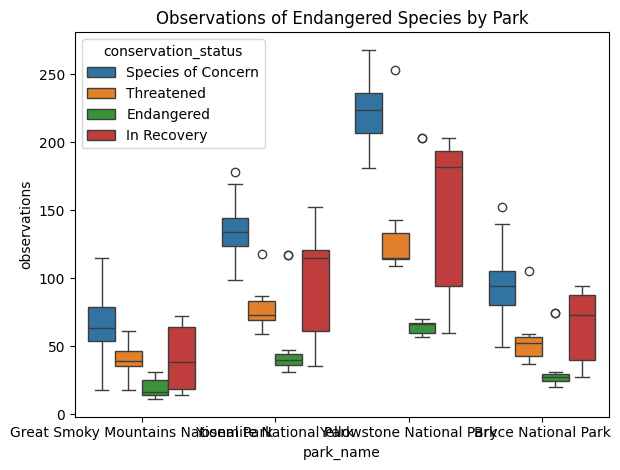

In [49]:
sn.boxplot(data=unified_df, x='park_name', y='observations', hue='conservation_status')
plt.title('Observations of Endangered Species by Park')
plt.tight_layout()
plt.show()

Using the boxplpt we can see we have different values per park, being the yellowston the bigger one, from ere we can continue the correlation study

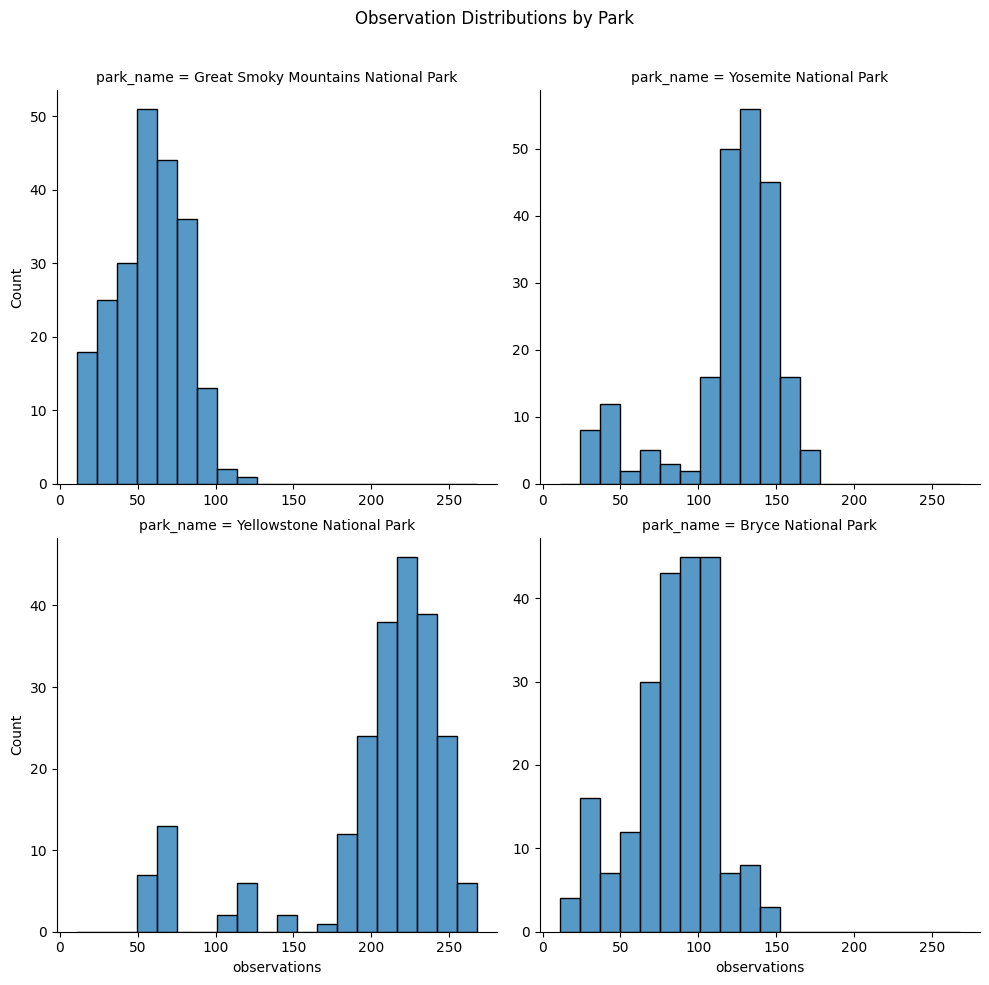

In [50]:
g = sn.displot(
    data=unified_df,
    x="observations",
    col="park_name",
    col_wrap=2,
    bins=20,
    facet_kws={'sharex': False, 'sharey': False}
)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Observation Distributions by Park")
plt.show()

In [51]:
groups = [group["observations"].values for _, group in unified_df.groupby("park_name")]
f_stat, p_val = f_oneway(*groups)

print(f"F-statistic: {f_stat:.3f}, p-value: {p_val:.4f}")

F-statistic: 695.770, p-value: 0.0000


Since we got a p-value of 0.0001, which is less than the significance level of 0.05, we can conclude that there are 
significant differences in the number of observations of endangered species across the different national parks.

Now we are aplyinh a Tukey HSD to see which park separates more from the others.


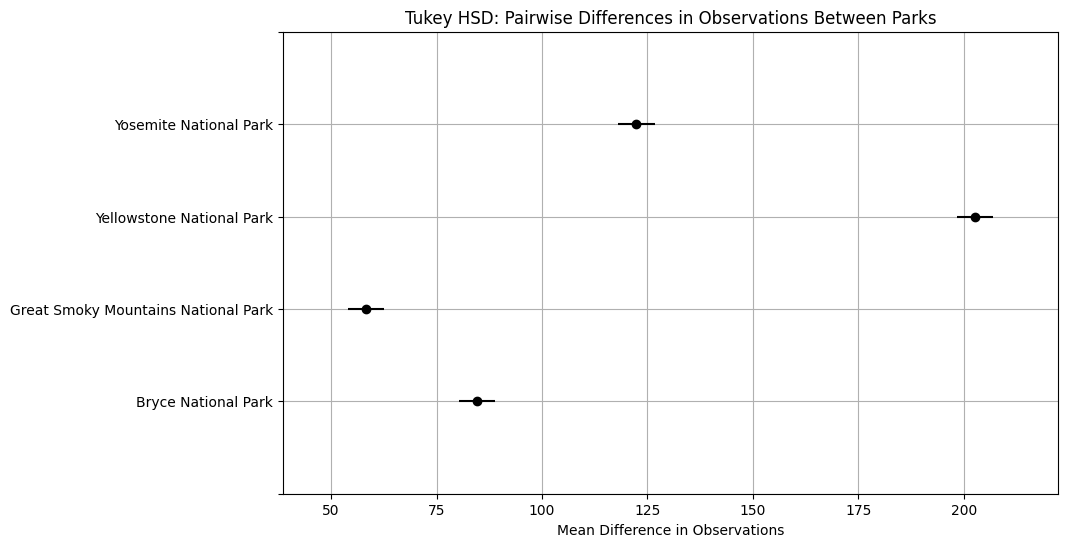

In [52]:
# Applying the Tukey HSD test
tukey = pairwise_tukeyhsd(endog=unified_df['observations'], groups=unified_df['park_name'], alpha=0.05)

tukey.plot_simultaneous(figsize=(10, 6))
plt.title("Tukey HSD: Pairwise Differences in Observations Between Parks")
plt.xlabel("Mean Difference in Observations")
plt.grid(True)
plt.show()

In [53]:
print(tukey.summary())
#save the Tukey HSD results to a CSV file
tukey_summary = tukey.summary().as_csv()
with open('tukey_hsd_results.csv', 'w') as f:
    f.write(tukey_summary)

                              Multiple Comparison of Means - Tukey HSD, FWER=0.05                              
               group1                              group2               meandiff p-adj  lower    upper   reject
---------------------------------------------------------------------------------------------------------------
                Bryce National Park Great Smoky Mountains National Park -26.3318   0.0  -35.011 -17.6527   True
                Bryce National Park           Yellowstone National Park 118.0636   0.0 109.3845 126.7428   True
                Bryce National Park              Yosemite National Park  37.7455   0.0  29.0663  46.4246   True
Great Smoky Mountains National Park           Yellowstone National Park 144.3955   0.0 135.7163 153.0746   True
Great Smoky Mountains National Park              Yosemite National Park  64.0773   0.0  55.3981  72.7564   True
          Yellowstone National Park              Yosemite National Park -80.3182   0.0 -88.9973  -71.639